In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## using Linear Regression model 


In [31]:
##Load the Dataset
train_df = pd.read_csv("C:/Users/gorla/Downloads/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("C:/Users/gorla/Downloads/house-prices-advanced-regression-techniques/test.csv")

print(train_df.shape)
train_df.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
##Separate Features & Target
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]


In [35]:
## Handle Missing Values (CRITICAL)
## Numerical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())


In [9]:
## Categorical columns
cat_cols = X.select_dtypes(include=["object"]).columns
X[cat_cols] = X[cat_cols].fillna("Missing")


In [11]:
## Encode Categorical Features
X = pd.get_dummies(X, drop_first=True)


In [13]:
## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
## Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
## Train the Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
## Prediction & Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 611487872756256.0
RMSE: 7293075423816949.0
R2 Score: -6.934379021278719e+21


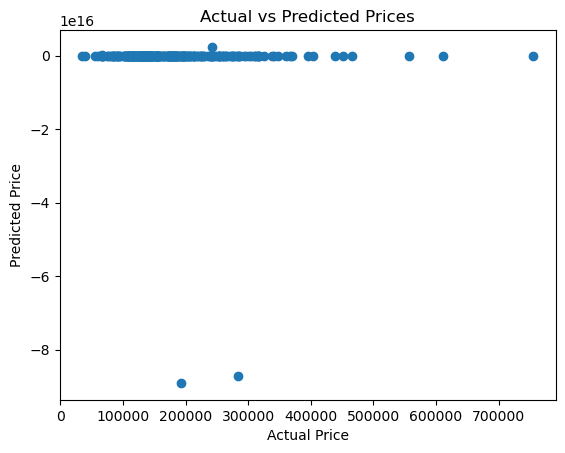

In [21]:
## Visualize Results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [42]:
## using Random Forest model
## Import Random Forest
from sklearn.ensemble import RandomForestRegressor



In [46]:
## Initialize the Model
rf_model = RandomForestRegressor(
    n_estimators=200,     # number of trees
    random_state=42,
    n_jobs=-1             # use all CPU cores
)


In [48]:
## rf_model.fit(X_train, y_train)

rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [50]:
## Predict House Prices
rf_predictions = rf_model.predict(X_test)



In [52]:
##Evaluate the Model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2 Score:", rf_r2)


Random Forest MAE: 17675.982191780822
Random Forest RMSE: 29399.806337598806
Random Forest R2 Score: 0.8873126658057363


In [54]:
# Linear Regression metrics
lr_rmse = rmse
lr_r2 = r2

# Random Forest metrics
rf_rmse = rf_rmse
rf_r2 = rf_r2


In [64]:
## Comparison Data
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rmse, rf_rmse],
    "R2 Score": [lr_r2, rf_r2]
})


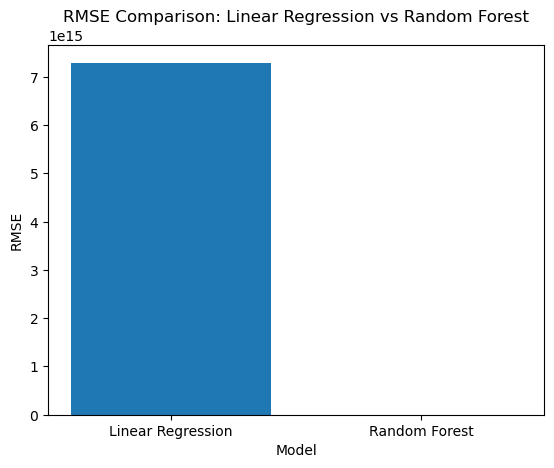

In [66]:
## Plot RMSE Comparison
import matplotlib.pyplot as plt

plt.figure()
plt.bar(comparison_df["Model"], comparison_df["RMSE"])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Comparison: Linear Regression vs Random Forest")
plt.show()


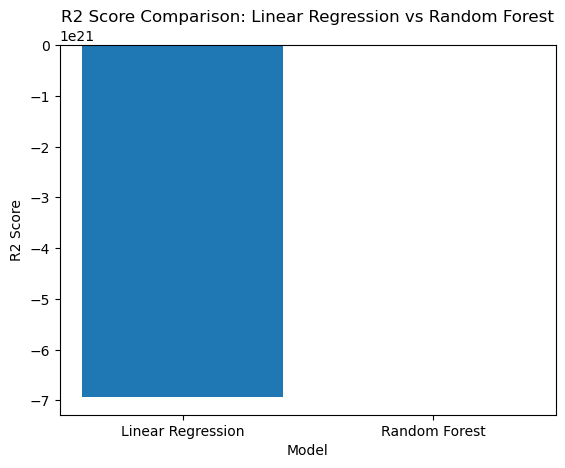

In [68]:
## Plot R² Score Comparison
plt.figure()
plt.bar(comparison_df["Model"], comparison_df["R2 Score"])
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Score Comparison: Linear Regression vs Random Forest")
plt.show()
